## Lab-1.2: Multi-variable linear regression

* In this lab we generalize the lab from last week to the case of general multi-variable regression. 
* Your solution should be fully general
  * This means it should work for arbitrary input matrix
  * And should be able to fit a model with an arbitrary number of fitting parameters

**Instructions** 
* Read and work through all tutorial content and do all exercises below
  
**Submission:**
* You need to upload TWO documents to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
  * (2) The .ipynb version of the completed form of this notebook 
  * Failure to submit BOTH versions will result in a 10% deduction per missing document.
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

### Import packages 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from   scipy.optimize import minimize
import pandas as pd
import seaborn as sns

In [2]:
# INSERT CODE TO EVALUATE THE SIGMOID (LOGISTIC) FUNCTION COMPONENT WISE ON A NUMPY ARRAY
def s(x):
    return 1/(1 + np.exp(-x))

### 1) Define dataset to fit  

In [3]:
#COULD SHOULD WORK WITH EITHER OF THESE DATA-SETS
dataset="2D_LINEAR"; model_type="linear"
#dataset="2D_LOGISTIC"; model_type="logistic"
#dataset="5D_LINEAR"; model_type="linear"

# DATA PARAM
N=2000; 
xmin=-10; 
xmax=10

if(dataset=="2D_LINEAR" or dataset=="2D_LOGISTIC"):
    #DEFINE A RANDOM INPUT MATRIX (X) ITH TWO FEATURES
    x=np.random.uniform(-10,10,(N,2))
    #DEFINE RESPONSE VARIABLES Y USING A LINEAR RESPONSE
    noise=np.random.uniform(-0.5,0.5,(N,))
    y=1.4*x[:,0]+4.5*x[:,1]+5+noise
    y=y.reshape(N,1)
    if(dataset=="2D_LOGISTIC"):
        y=s(y)
if(dataset=="5D_LINEAR"):
    #DEFINE A RANDOM INPUT MATRIX (X) ITH TWO FEATURES
    x=np.random.uniform(-10,10,(N,5))
    #DEFINE RESPONSE VARIABLES Y USING A LINEAR RESPONSE
    noise=np.random.uniform(-0.5,0.5,(N,))
    y=1.4*x[:,0]+4.5*x[:,1]+3.5*x[:,2]+8.6*x[:,3]-1.5*x[:,4]+5+noise
    y=y.reshape(N,1)


### Explore data

In [4]:
# INSERT CODE TO PRINT THE SHAPE OF YOUR DATA SET
print(x.shape)

(2000, 2)


In [5]:
print(y.shape)

(2000, 1)


<Figure size 432x288 with 0 Axes>

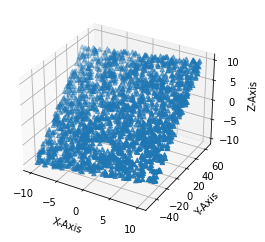

In [6]:
# INSERT CODE TO PLOT IN 3D (XYZ) IF x.shape[1]=2 (otherwise do nothing)
if x.shape[1] ==2:
    fig = plt.figure()
    ax = plt.figure().add_subplot(projection='3d')
    x_data = x[:,0]
    z_data = x[:,1]
    # Labelling X-Axis
    ax.set_xlabel('X-Axis')
    # Labelling Y-Axis
    ax.set_ylabel('Y-Axis')
    # Labelling Z-Axis
    ax.set_zlabel('Z-Axis')
    ax.scatter(x_data,y,z_data, marker= '^')
    plt.show()
else:
    pass

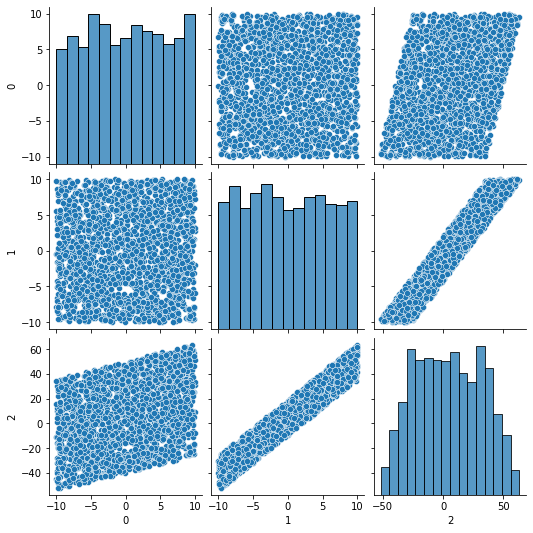

In [7]:
## INSERT CODE TO DO A PAIR-CORRLATION PLOT WITH SEABORN FOR THE X and Y DATA
data = pd.DataFrame(np.concatenate([x,y], axis = 1))
sns.pairplot(data)
plt.show()

### Define your model

In [8]:
# INSERT CODE THAT TAKES A MATRIX X, A VECTOR P, AND RETURNS EITHER A LINEAR OR LOGISTIC MODEL
# * it should work for linear regression and logistic regression
# * in both cases use p[0] as the bias term

def m(x,p):
    p=p.reshape(p.shape[0],1)
    if model_type =="linear":
        mod = p[1]*x[:,0] + p[2]*x[:,1] + p[0]
        return mod
    if model_type =="logistic":
        mod = 1/(1+np.exp(-p[1]*x + p[0]))
        return mod
    
    #FINISH


### 2) Define a measure of success 
* For our success measure, we will use the root mean square error. 
  * This is arguably the most common regression objective function (i.e error metric).

In [9]:
#  * Write an objective function, called "loss", that returns the RMSE for the training set, given a parameterization vector p for a model (see below for more on the model) 
#   * This can be done in one line with Numpy component wise operations or with a for loop to compute the sum

def loss(p):
    global x_train, y_train
    #INSERT CODE HERE
    y_act = m(x_train, p)
    mse = 0
    for i in range(len(y_train)):
        mse += np.square(y_act[i] - y_train[i])/len(y_train)
        #rmse = np.linalg.norm(y - y_train) / np.sqrt(len(y_train))
    rmse = np.sqrt(mse)
    return rmse

### 3) Define Evaluation protocol  
  
**ASSIGNMENT-3** 
  * Split the data into an 80-20 training-validation set
  * Plot the training and validation data together (you can copy, tweak, and recycle your code from the plot above)

In [10]:
# INSERT CODE TO PARTITION DATA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 10)

In [11]:
# INSERT CODE TO PRINT THE SHAPE OF THE TRAINING SET (SANITY CHECK)
print(x_train.shape)
print(y_train.shape)

(1600, 2)
(1600, 1)


In [12]:
# INSERT CODE TO PRINT THE SHAPE OF THE VALIDATION SET (SANITY CHECK)
print(x_test.shape)
print(y_test.shape)

(400, 2)
(400, 1)


<Figure size 432x288 with 0 Axes>

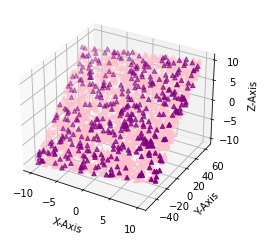

In [13]:
# INSERT CODE TO PLOT IN 3D BOTH THE THE TRAINING AND VALIDATION SET ONLY IF x.shape[1]=2 (otherwise do nothing)
if x.shape[1] ==2:
    fig = plt.figure()
    ax = plt.figure().add_subplot(projection='3d')
    x_traindata = x_train[:,0]
    z_traindata = x_train[:,1]
    x_testdata = x_test[:,0]
    z_testdata = x_test[:,1]
    # Labelling X-Axis
    ax.set_xlabel('X-Axis')
    # Labelling Y-Axis
    ax.set_ylabel('Y-Axis')
    # Labelling Z-Axis
    ax.set_zlabel('Z-Axis')
    ax.scatter(x_traindata,y_train,z_traindata, marker= '^', color = 'pink')
    ax.scatter(x_testdata,y_test,z_testdata, marker= '^', color = 'purple')
    plt.show()
else:
    pass

### 4) Prepare the data

**ASSIGNMENT-4** 

* Normalize the x data using x --> (x-u_x)/sigma_x
* Normalize the y data using y --> (y-u_y)/sigma_y
* The quantities u_x, u_y, sigma_x and sigma_y should be stored as variables and computed from the training set
* Re-plot the data, notice how numbers on the axis are dramatically different and range roughly -2 to 2. 
* You don't need to include units since the data has no units after normalization

In [14]:
# INSERT CODE TO COMPUTE THE MEAN DOWN THE COLUMNS OF X AND Y 
u_x = np.mean(x_train)
sigma_x = np.std(x_train)
u_y = np.mean(y_train)
sigma_y = np.std(y_train)
print('mean of x data is:', np.mean(x))
print('mean of y data is:', np.mean(y))

mean of x data is: 0.021323693936497704
mean of y data is: 4.729682962591362


In [15]:
# INSERT CODE TO PRINT THE MEAN, STD, AND THE SHAPES (SANITY CHECK)
print('mean of x data is:', np.mean(x))
print('mean of y data is:', np.mean(y))
print('std of x data is:', np.std(x))
print('std of y data is:', np.std(y))
print('shape of x data is:', x.shape)
print('shape of y data is:', y.shape)

mean of x data is: 0.021323693936497704
mean of y data is: 4.729682962591362
std of x data is: 5.749438495004863
std of y data is: 27.46832375794151
shape of x data is: (2000, 2)
shape of y data is: (2000, 1)


In [31]:
import numpy as np
def f(x): 
    return 2.71*x[:,0]**2+3.14*x[:,1]+1*x[:,2]+2

#x=np.array([1,2,3])
x=np.array([[1,2,3],[1,1,1]])
print(x)
print(f(x))

# def grad(f,x0,dx):
#     Df=np.zeros(x0.shape)
#     for i in range(0,len(x0)):
#         DX=np.zeros(x0.shape)
#         DX[i]=dx
#         f2=f(x0+DX)
#         f1=f(x0-DX)
#         grad[i]=(f2-f1)/(2*dx)

[[1 2 3]
 [1 1 1]]
[13.99  8.85]


In [16]:
#INSERT CODE TO NORMALIZE THE COLUMNS OF THE DATA SET USING THESE QUANTITIES 
# note: add an if statement to only normalize y values if model_type="linear", i.e. don't normalize logistic y data 

#TRAINING
if model_type=="linear":
    x_norm_train = (x_train - u_x) / sigma_x
    y_norm_train = (y_train - u_y) / sigma_y
else:
    x_norm_train = (x_train - u_x) / sigma_x
    y_norm_train = y_train
#VALIDATION
if model_type=="linear":
    x_norm_test = (x_test - u_x) / sigma_x
    y_norm_test = (y_test - u_y) / sigma_y
else:
    x_norm_test = (x_test - u_x) / sigma_x
    y_norm_test = y_test

<Figure size 432x288 with 0 Axes>

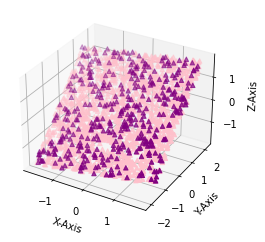

In [17]:
# INSERT CODE TO PLOT IN 3D BOTH THE THE TRAINING AND VALIDATION SET ONLY IF x.shape[1]=2 (otherwise do nothing)
# NOTICE HOW THE UNITS CHANGES 
if x.shape[1] ==2:
    fig = plt.figure()
    ax = plt.figure().add_subplot(projection='3d')
    x_traindata_n = x_norm_train[:,0]
    z_traindata_n = x_norm_train[:,1]
    x_testdata_n = x_norm_test[:,0]
    z_testdata_n = x_norm_test[:,1]
    # Labelling X-Axis
    ax.set_xlabel('X-Axis')
    # Labelling Y-Axis
    ax.set_ylabel('Y-Axis')
    # Labelling Z-Axis
    ax.set_zlabel('Z-Axis')
    ax.scatter(x_traindata_n,y_norm_train,z_traindata_n, marker= '^', color = 'pink')
    ax.scatter(x_testdata_n,y_norm_test,z_testdata_n, marker= '^', color = 'purple')
    plt.show()
else:
    pass

### 4) Train your model 

**ASSIGNMENT-6** 
* Choose an initial guess for the parameter vector p
  * If you randomly generate the initial guess, you may have to run the optimization algorithm several times before getting a good fit
  * Remember that "bad fits", correspond to bad choices for the fitting parameters, these occur when the optimizer gets "stuck" in a bad local minima in the parameter space.
  * Optionally, you can ensure a "good fit" every time, by looking at the normalized plot and the functional form of the model and manually choosing fitting parameters that "make sense". 
* Use the Scipy minimizer from Part-1 to minimize the loss function, by varying the components of the parameter vector p, to find the best fit for the model 
* Make predictions with the fitted model for the test and validation data
* plot the predictions in the normalized space
* un-normalize the data so that it has units again
* Plot the results in the un-normalized space

In [18]:
# INSERT CODE TO CHOOSE A RANDOM INITIAL GUESS (INFER THE LENGTH FROM X DATA SHAPE)
p0 = np.array([2.71, 3.14,1,2])
# INSERT CODE TO TRAIN YOUR MODEL 

# EITHER USING scipy MIMIMIZER OR YOUR OWN GRADIENT DESENT CODE FROM HW-2 
res = minimize(loss, p0, method='BFGS', tol=1e-5)
popt=res.x
#p = popt.tolist()
print("OPTIMAL PARAM:",popt)
# # PREDICTION 
yp_train=m(x_train,popt)
yp_val=m(x_test,popt)

OPTIMAL PARAM: [4.99922479 1.40051513 4.50003098 2.        ]


In [19]:
## INSERT CODE TO PRINT THE SHAPE (SANITY CHECK)
print(yp_train.shape)
print(yp_val.shape)

(1600,)
(400,)


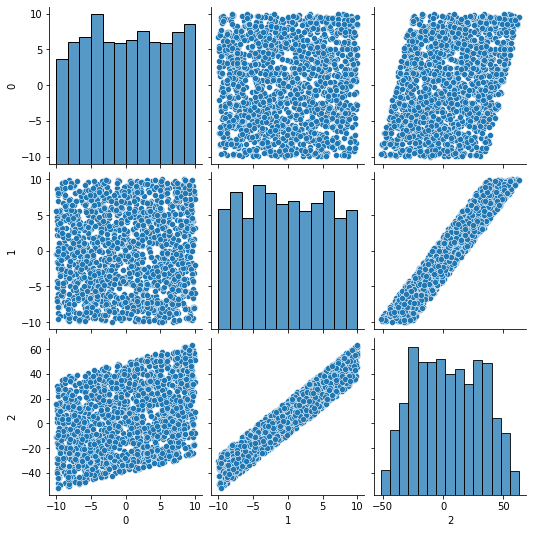

In [27]:
## INSERT CODE TO CREATE TWO PAIRY PLOTS, ONE FOR TRAINING A
df_train = pd.DataFrame(np.concatenate([x_train,y_train], axis = 1))
sns.pairplot(df_train)
plt.show()

In [28]:
yp_t = yp_train.reshape(400,4)
yp_v = yp_val.reshape(400,1)

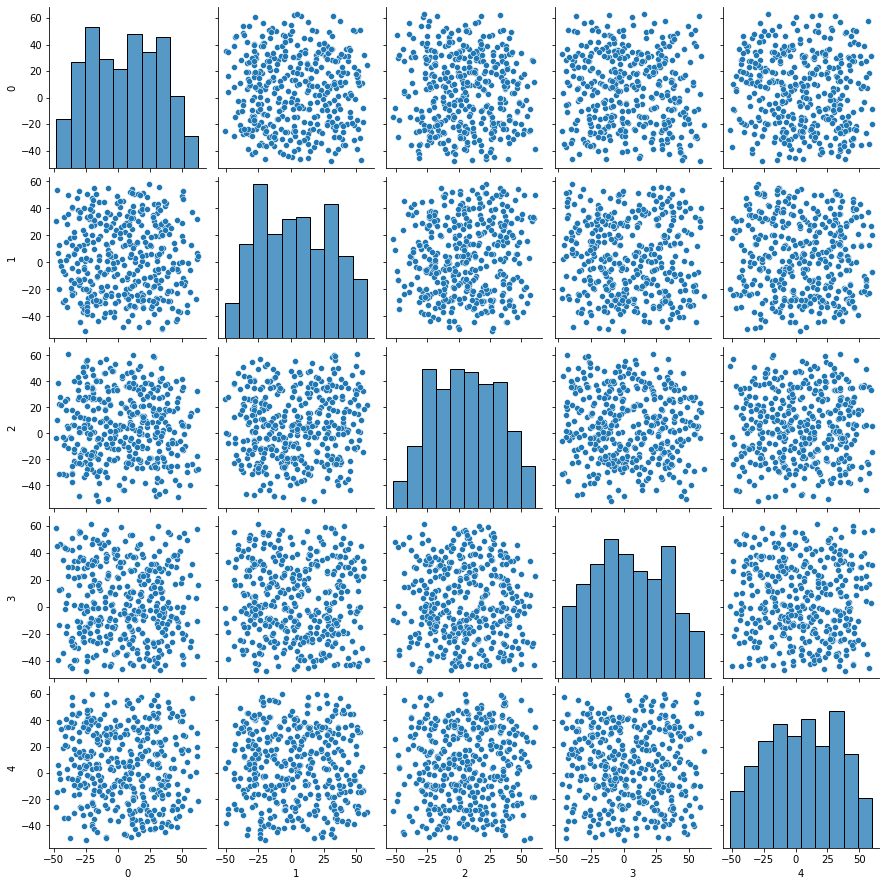

In [29]:
df_val = pd.DataFrame(np.concatenate([yp_t,yp_v], axis =1))
sns.pairplot(df_val)
plt.show()

<Figure size 432x288 with 0 Axes>

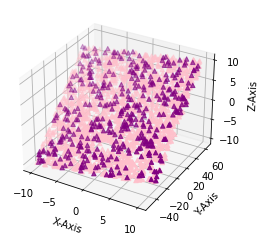

In [30]:
# INSERT CODE TO PLOT IN 3D BOTH THE THE XYZ FOR TRAINING-SET AND PERDICTIONS ONLY IF x.shape[1]=2 (otherwise do nothing)
# NOTICE HOW THE UNITS CHANGES 
if x.shape[1] ==2:
    fig = plt.figure()
    ax = plt.figure().add_subplot(projection='3d')
    x_traindata = x_train[:,0]
    z_traindata = x_train[:,1]
    x_testdata = x_test[:,0]
    z_testdata = x_test[:,1]
    x_pred = yp_train
    y_pred = yp_val
    # Labelling X-Axis
    ax.set_xlabel('X-Axis')
    # Labelling Y-Axis
    ax.set_ylabel('Y-Axis')
    # Labelling Z-Axis
    ax.set_zlabel('Z-Axis')
    ax.scatter(x_traindata,x_pred,z_traindata, marker= '^', color = 'pink')
    ax.scatter(x_testdata,y_pred, z_testdata , marker= '^', color = 'purple')
    plt.show()
else:
    pass
